In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\data\openparliament\vocab_count_df")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.columns

Index(['member_id', ' ', '  ', '   ', '    ', '     ', '      ', '       ',
       '        ', '         ',
       ...
       'uber.1', 'uberminister', 'oeuvrant', 'qoyannamiik', ''', '"', '".1',
       '*', '*support', 'EUR'],
      dtype='object', length=68465)

df.index = df['member_id']

In [5]:
df_wordcount = df.transpose()

In [6]:
new_header = df_wordcount.iloc[0]

In [7]:
df_wordcount = df_wordcount[1:]

In [8]:
df_wordcount.columns = new_header

In [9]:
vocab_len = df_wordcount.sum(axis=0)

In [10]:
vocab_len.sort_values(ascending=False, inplace=True)

In [11]:
vocab_len.head()

member_id
177     11847
185     11388
11      10551
9187    10406
146     10021
dtype: int64

In [12]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\core_electedmember.csv")

In [13]:
df_electedmember.head()

,id,politician_id,riding_id,party_id,end_date,start_date
0,4015,2693,70159,5,2000-09-11,2000-04-02
1,4016,2693,70159,4,2001-01-28,2000-09-12
2,4017,4136,59023,4,2005-05-23,2002-01-28
3,4018,4983,70116,5,2004-05-23,2002-08-20
4,4019,5258,70139,5,2003-03-14,2003-01-16


In [14]:
df.head()

,member_id,,,,,,,,,,...,uber.1,uberminister,oeuvrant,qoyannamiik,',"""",""".1",*,*support,EUR
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,216,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
politician_vocab = df.merge(df_electedmember, how='inner', left_on='member_id', right_on='politician_id')

In [79]:
politician_vocab.drop(['member_id'], axis=1, inplace=True)

'politician_id' is in politician_vocab

In [84]:
politician_vocab.head()

,,,,,,,,,,,...,""".1",*,*support,EUR,id_y,politician_id,riding_id,party_id,end_date,start_date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3210,3465,70224,4,1997-04-27,1994-01-17
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2611,3465,35066,4,2005-11-29,1997-09-22
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1534,173,47007,1,2015-10-19,2004-10-04
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,4305,173,70358,1,NaN,2015-10-19
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,3342,43,47014,28,2000-10-22,1994-01-17


In [85]:
vocab_frame=vocab_len.to_frame()

In [86]:
vocab_frame.head()

,0
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [87]:
vocab_frame.rename({0: 'vocab_size'}, axis=1, inplace=True)

In [88]:
vocab_frame.head()

,vocab_size
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [89]:
vocab_frame.reset_index(inplace=True)

In [90]:
vocab_frame.head()

,member_id,vocab_size
0,177,11847
1,185,11388
2,11,10551
3,9187,10406
4,146,10021


In [91]:
politician_vocab = df_electedmember.merge(vocab_frame, how='inner', left_on='politician_id', right_on='member_id')

In [93]:
politician_vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3364
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3364
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3364
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3364
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2565


In [94]:
party_vocab.start_date[0]

Timestamp('2000-04-02 00:00:00')

In [95]:
party_vocab_size = party_vocab.pivot_table(values='vocab_size', index='party_id', aggfunc='mean')

In [96]:
party_vocab_size.reset_index(inplace=True)

In [97]:
party_vocab_size.sort_values(by='vocab_size', inplace=True)

In [98]:
party_vocab_size.head()

,party_id,vocab_size
9,39,2555.000000
10,46,3137.428571
3,4,3231.884892
2,3,3701.369565
4,5,3929.684211


In [99]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)

In [100]:
party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']

In [101]:
party_df.columns = party_names

In [102]:
party_df.head()

,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,32,Abolitionist Party of Canada,NaN,Abolitionist Party of Canada,Abolitionist Party of Canada,Abolitionist Party of Canada
1,24,Animal Alliance Environment Voters Party of Ca...,NaN,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...
2,30,Canada Party,NaN,Canada Party,Canada Party,Canada Party
3,16,Canadian Action Party,NaN,Canadian Action Party,Canadian Action Party,Canadian Action Party
4,10,Christian Heritage Party of Canada,NaN,Christian Heritage Party of Canada,Christian Heritage Party of Canada,Christian Heritage Party of Canada


In [103]:
party_vocab_size = party_vocab_size.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [38]:
party_vocab_size.sort_values(by='vocab_size', inplace=True, ascending=False)

In [105]:
party_vocab_size.head()

,party_id,vocab_size,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,39,2555.000000,39,Forces et Démocratie,forces,Forces et Démocratie,Forces et Démocratie,Forces et Démocratie
1,46,3137.428571,46,Québec debout,NaN,Québec debout,Québec debout,Québec debout
2,4,3231.884892,4,Liberal Party of Canada,liberal,Liberal,Parti libéral du Canada,Libéral
3,3,3701.369565,3,Bloc Québécois,bloc,Bloc,Bloc Québécois,Bloc
4,5,3929.684211,5,Independent,IND,Independent,Indépendant,Indépendant


In [106]:
from matplotlib import pyplot as plt

In [43]:
party_vocab_size.fillna('', inplace=True)

In [44]:
y_data = party_vocab_size.vocab_size.values

In [45]:
x_data = party_vocab_size.slug.values

In [46]:
type(x_data[1])

str

<BarContainer object of 11 artists>

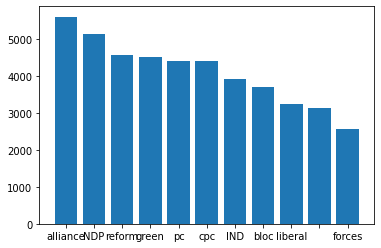

In [47]:
plt.bar(x_data, y_data)

## party_vocab

In [48]:
party_vocab.start_date[0]

'2000-04-02'

In [49]:
tenure = pd.to_datetime(party_vocab.end_date, infer_datetime_format=True) - pd.to_datetime(party_vocab.start_date, infer_datetime_format=True)  

In [50]:
party_vocab.start_date = pd.to_datetime(party_vocab.start_date, infer_datetime_format=True)

In [51]:
party_vocab.end_date = pd.to_datetime(party_vocab.end_date, infer_datetime_format=True)

In [52]:
party_vocab["tenure"] = party_vocab.end_date - party_vocab.start_date

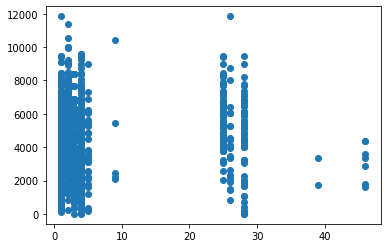

In [53]:
plt.scatter(party_vocab.party_id, party_vocab.vocab_size)

In [54]:
t = party_vocab.tenure[0]

In [55]:
party_vocab['days_elected'] = party_vocab.tenure.apply(lambda x: x.days)

Text(0, 0.5, 'estimated vocabulary size')

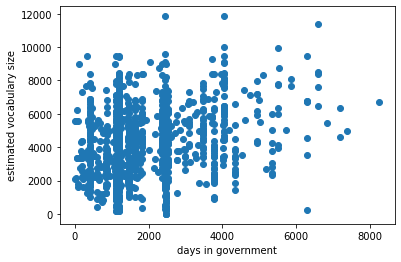

In [56]:
plt.scatter(party_vocab.days_elected, party_vocab.vocab_size)
plt.xlabel('days in government')
plt.ylabel('estimated vocabulary size')

next: make a graph of number of utterances in the HoC by vocab size, I suspect it'll just show 
a linear relationship

In [58]:
%%time 
utterances_df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")

<string>:2: DtypeWarning: Columns (20,23,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 42 s


In [ ]:
utterances_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#utterances_df.head()

In [ ]:
times_spoken = utterances_df.pivot_table(values='slug', index='politician_id', aggfunc='count')

In [62]:
times_spoken.shape

(1051, 1)

In [65]:
times_spoken.rename({'slug': 'utterances'}, axis=1, inplace=True)

In [66]:
times_spoken.head()

,utterances
politician_id,
1,2484
2,4408
5,1164
6,3130
7,1596


In [69]:
 party_vocab.shape

(1499, 10)

In [109]:
times_spoken.reset_index(inplace=True)

In [114]:
#get the rows of times_spoken that are in party_vocab

In [111]:
party_vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size,tenure,days_elected
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3364,162 days,162.0
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3364,138 days,138.0
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3364,922 days,922.0
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3364,1210 days,1210.0
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2565,1211 days,1211.0


In [123]:
vocab_normal = party_vocab.merge(times_spoken, how='left', left_on=party_vocab.politician_id, right_on=times_spoken.politician_id)

In [124]:
vocab_normal.shape

(1499, 13)

In [125]:
vocab_normal.utterances.isna().sum()

0

In [126]:
vocab_normal.utterances.describe()

count     1499.000000
mean      1192.635090
std       1906.227905
min          1.000000
25%        182.000000
50%        547.000000
75%       1374.000000
max      21240.000000
Name: utterances, dtype: float64

In [127]:
vocab_normal.columns

Index(['key_0', 'id', 'politician_id_x', 'riding_id', 'party_id', 'end_date',
       'start_date', 'member_id', 'vocab_size', 'tenure', 'days_elected',
       'politician_id_y', 'utterances'],
      dtype='object')

In [128]:
vocab_normal['normalized_utterances'] = vocab_normal['vocab_size']/vocab_normal['utterances']

these vocab_normal numbers are awful, modifying vocab by the word count makes far more sense

In [ ]:
df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")
df.drop('Unnamed: 0',axis=1, inplace=True)